Streaming output truncated to the last 5000 lines.
After  155020 times of trainings
0.03809256851673126
After  155030 times of trainings
0.07217775285243988
After  155040 times of trainings
0.0045398930087685585
After  155050 times of trainings
0.006109993439167738
After  155060 times of trainings
0.04107765108346939
After  155070 times of trainings
0.01981225796043873
After  155080 times of trainings
0.008503945544362068
After  155090 times of trainings
0.046612195670604706
After  155100 times of trainings
0.003513228613883257
After  155110 times of trainings
0.03921295702457428
After  155120 times of trainings
0.004525364376604557
After  155130 times of trainings
0.03892286494374275
After  155140 times of trainings
0.007634109351783991
After  155150 times of trainings
0.011636702343821526
After  155160 times of trainings
0.05016292259097099
After  155170 times of trainings
0.02554122731089592
After  155180 times of trainings
0.01637955568730831
After  155190 times of trainings
0.0628

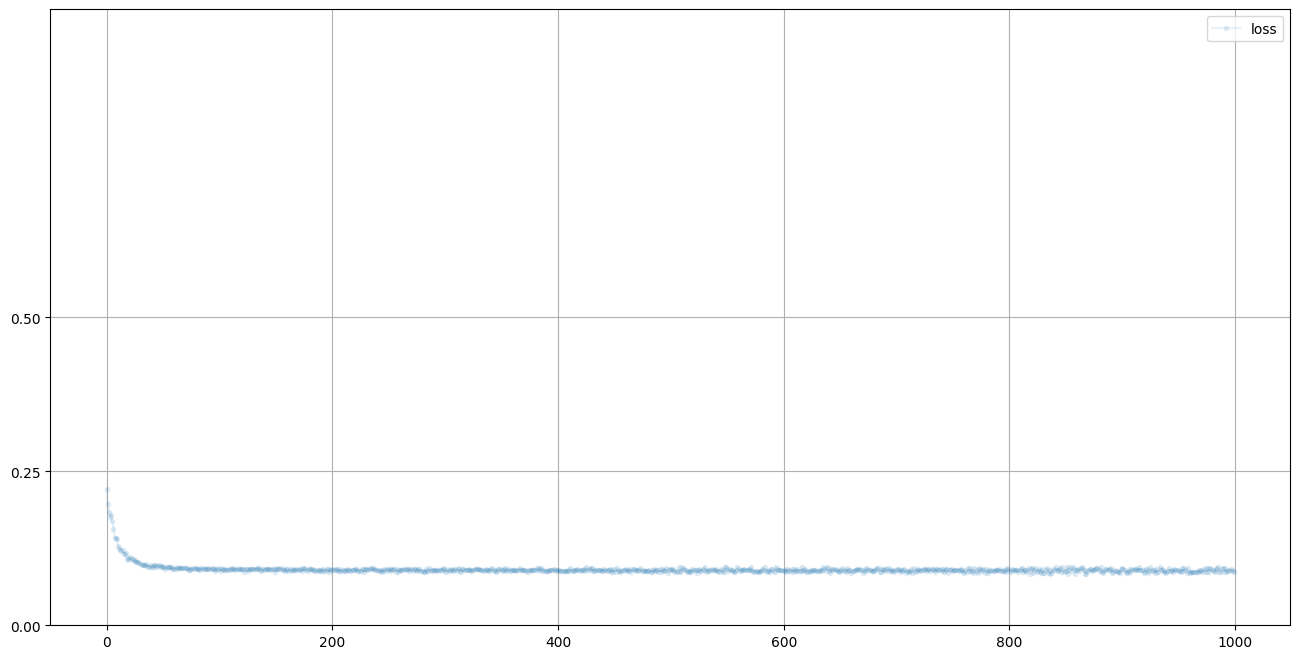

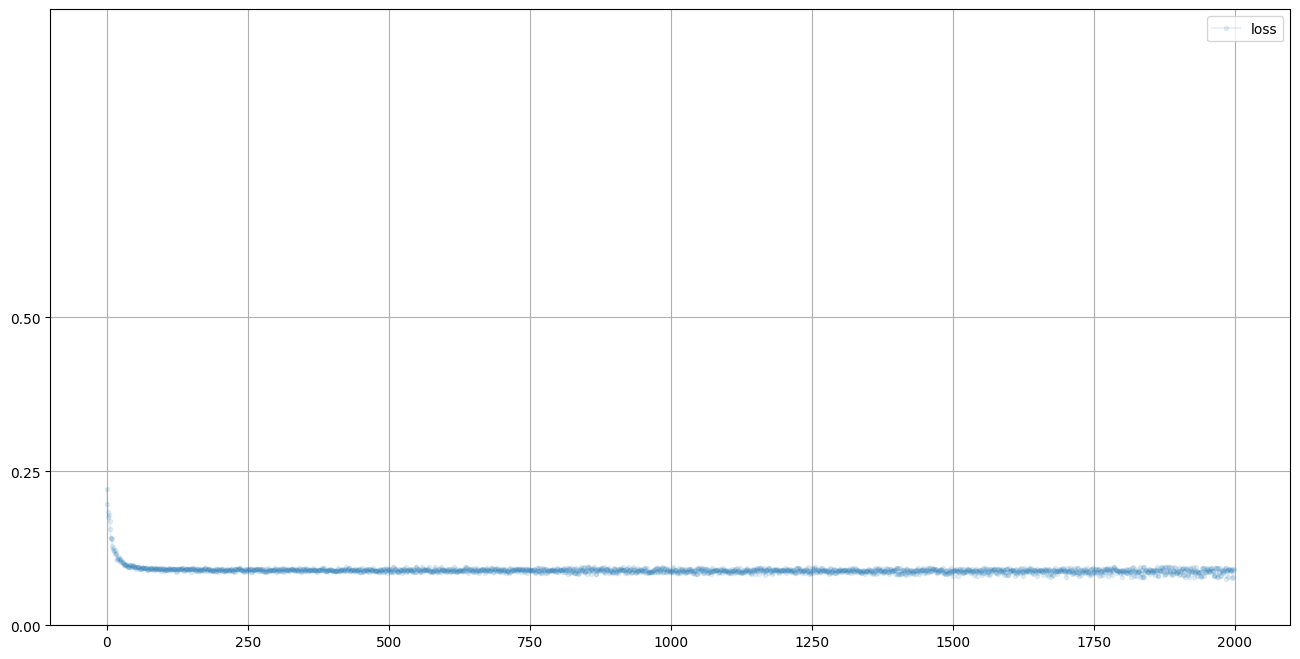

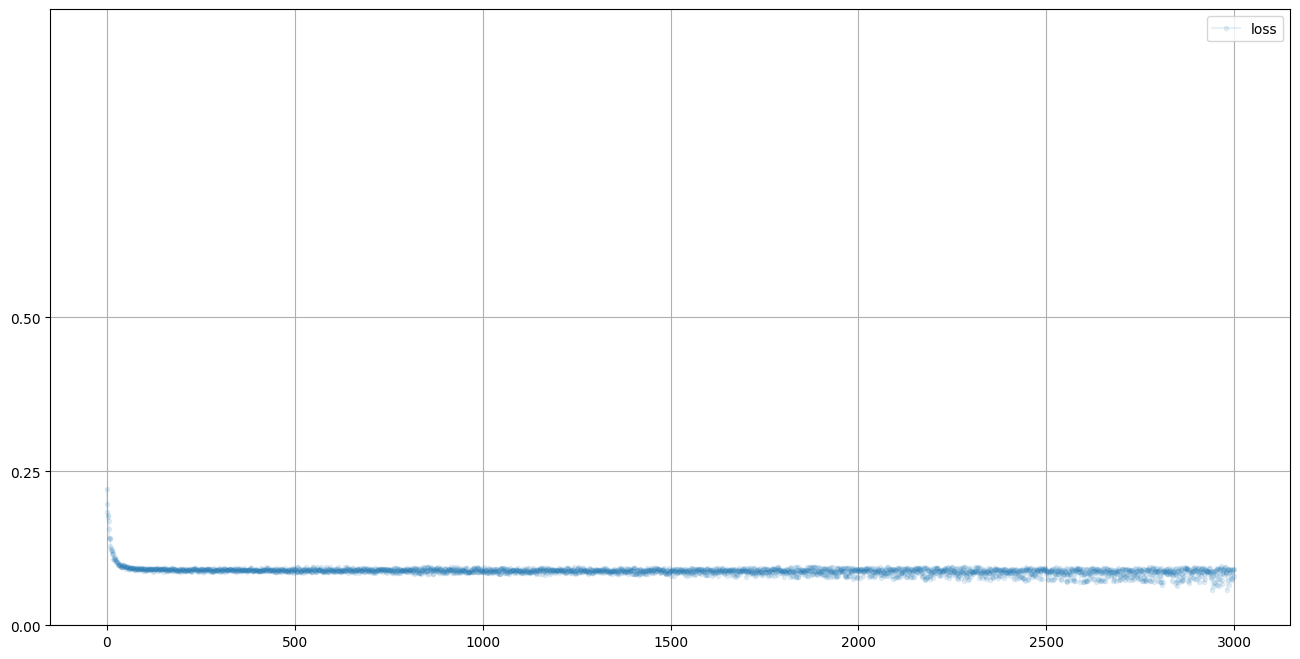

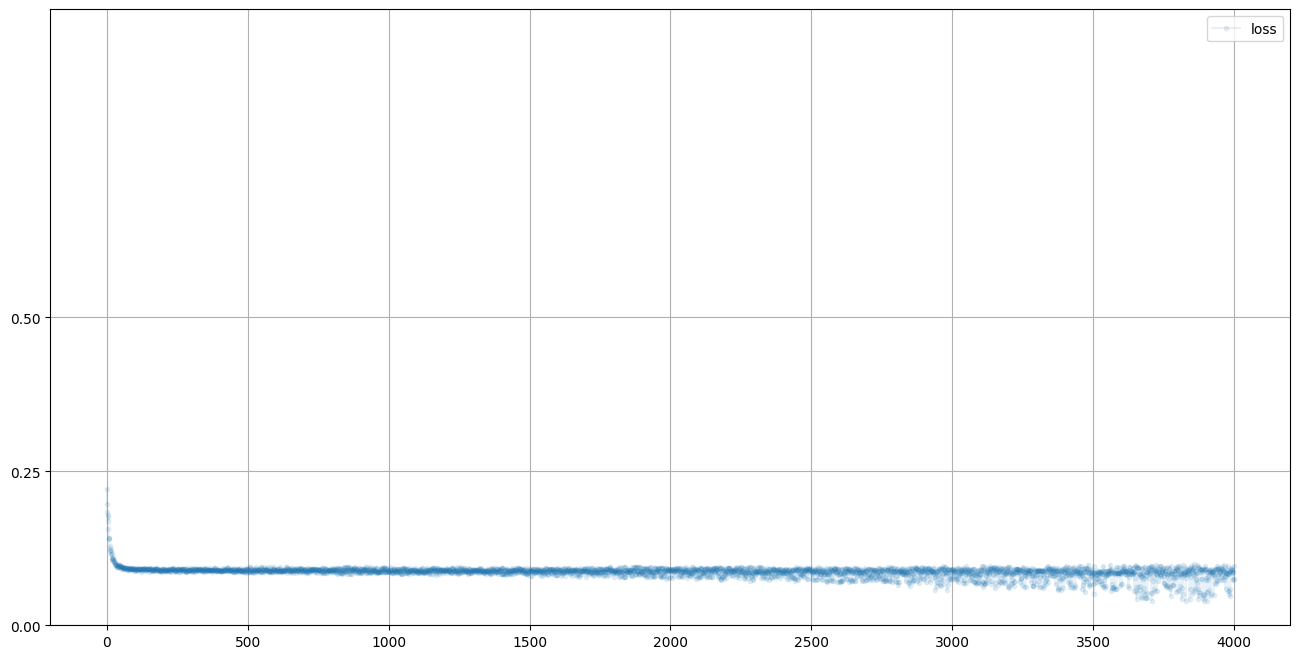

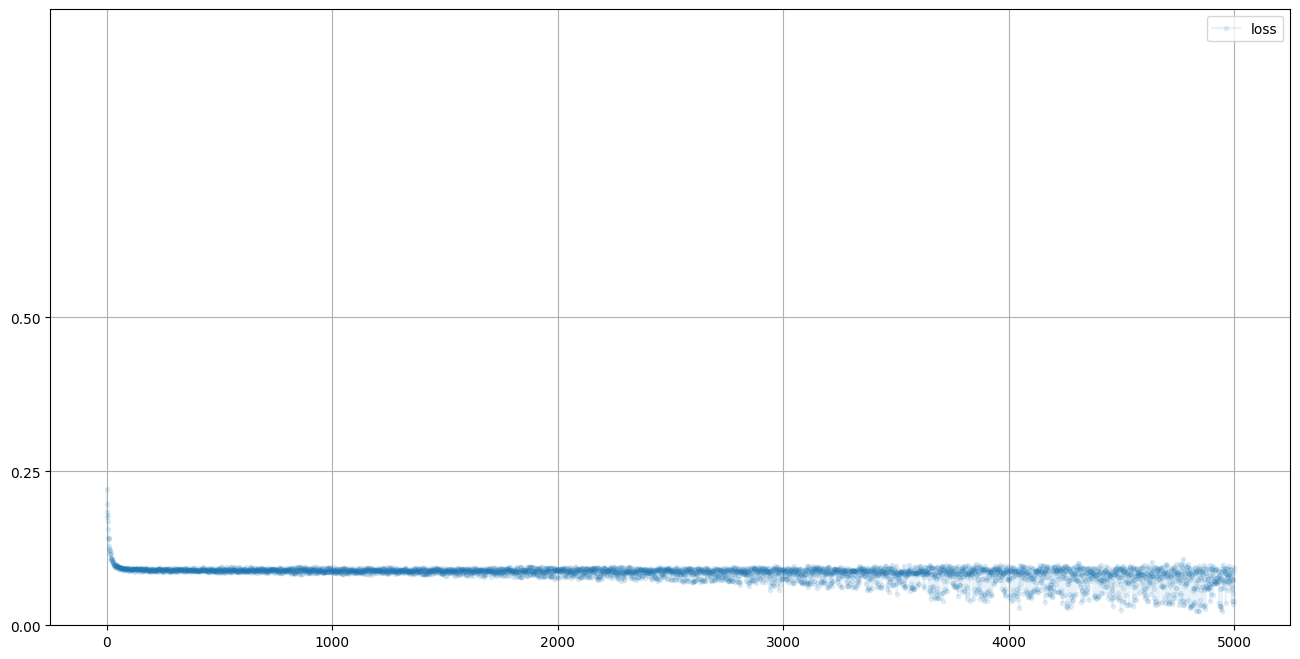

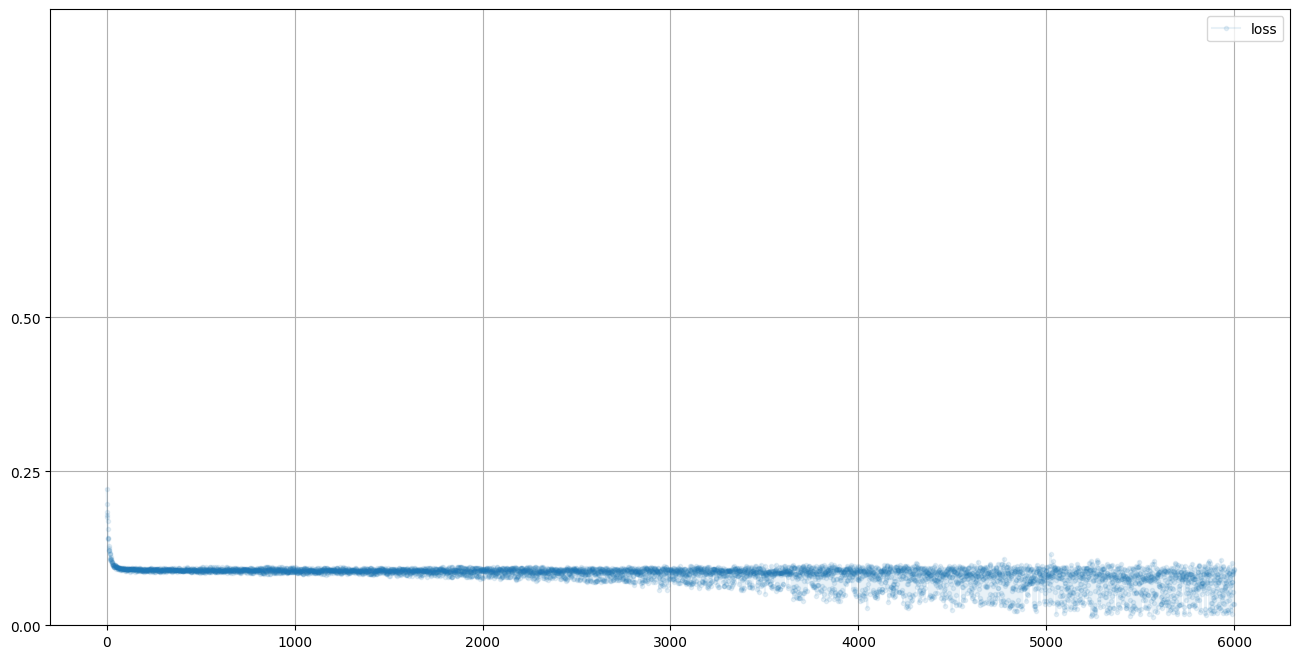

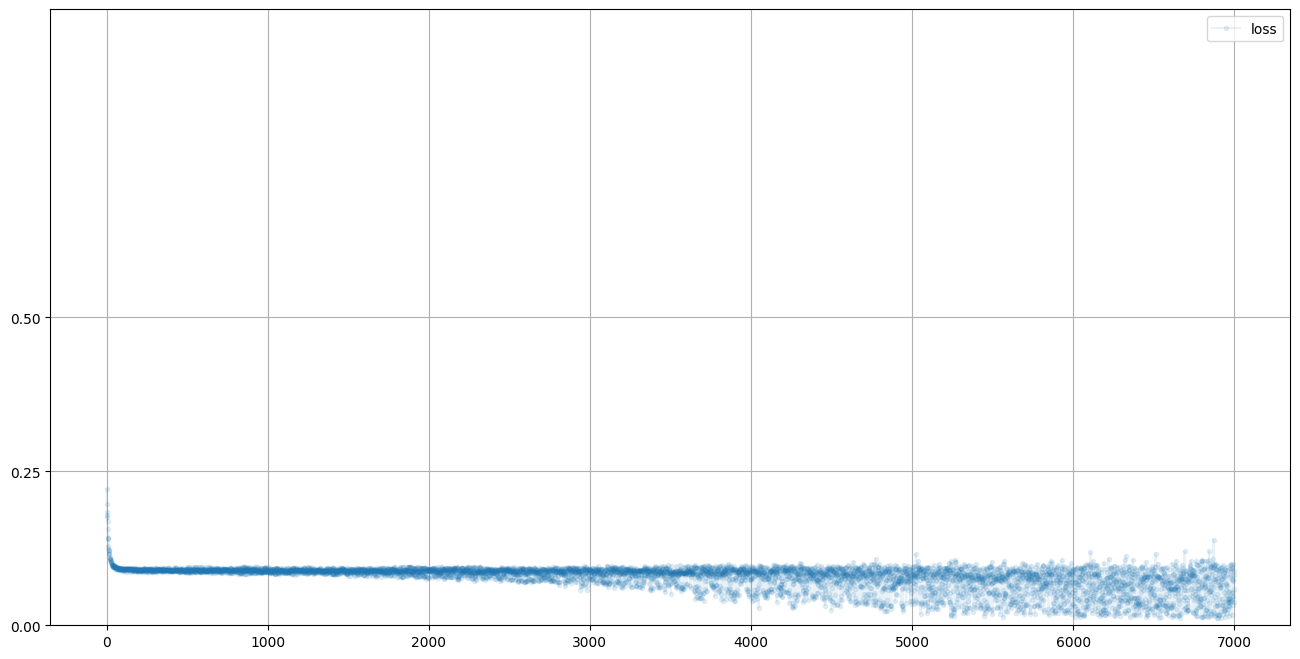

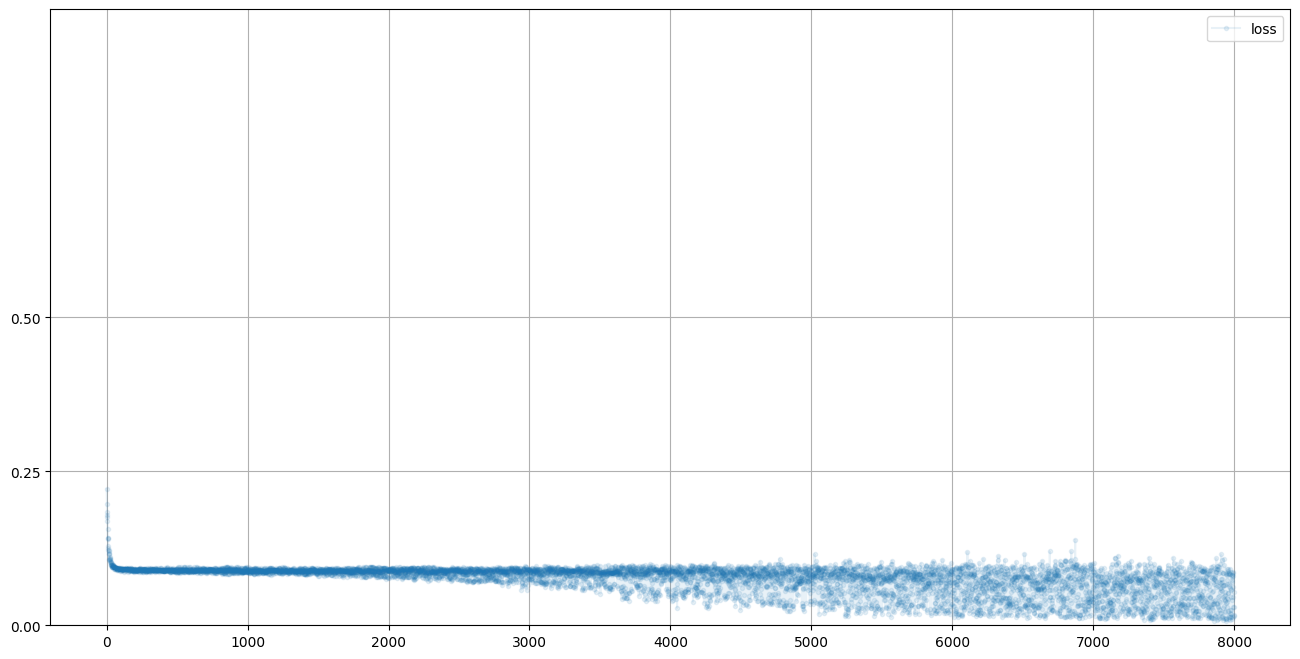

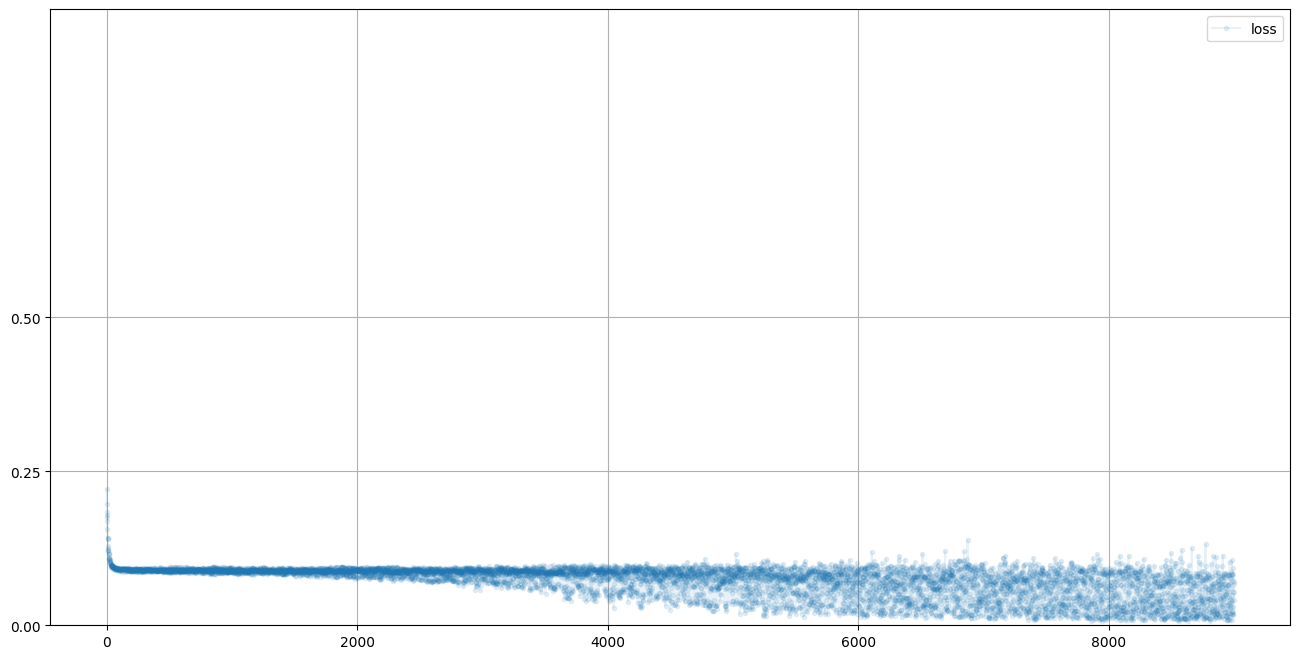

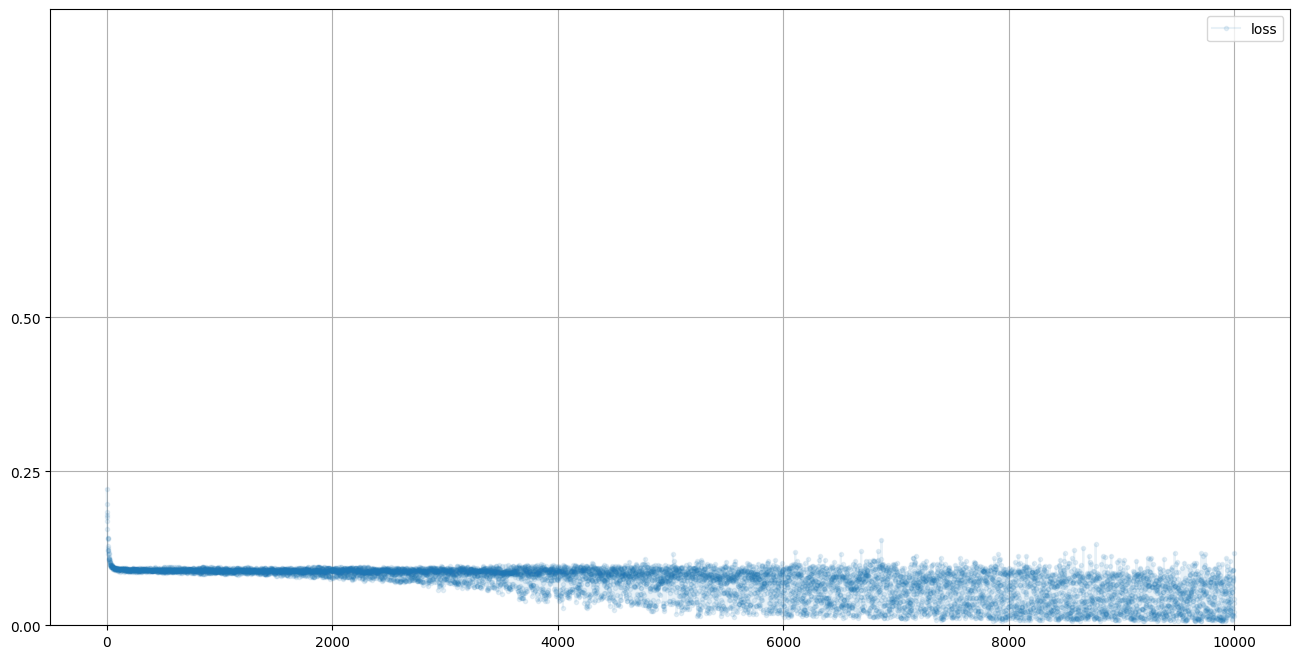

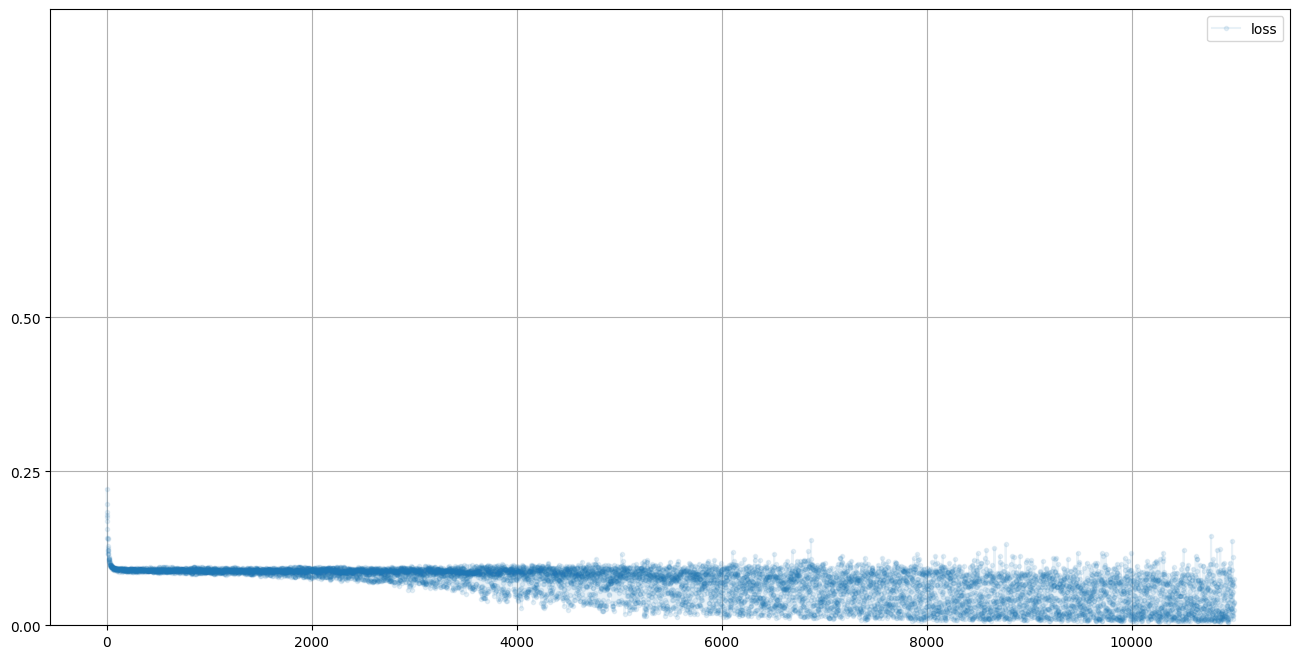

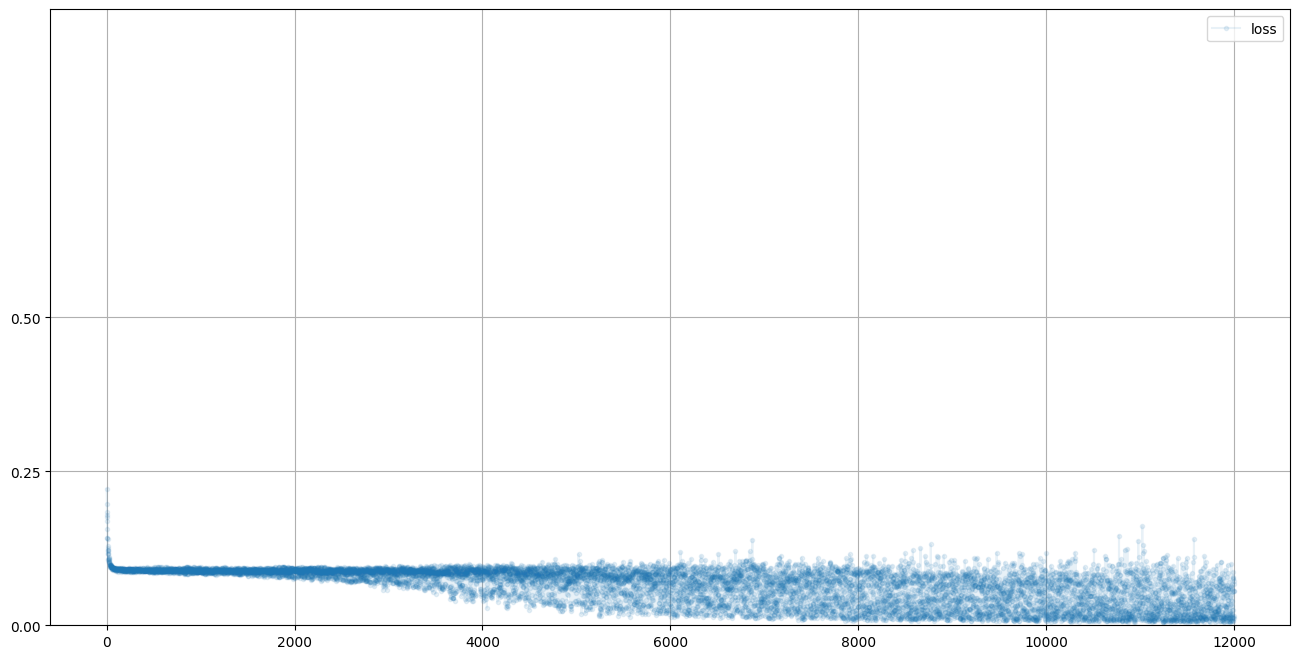

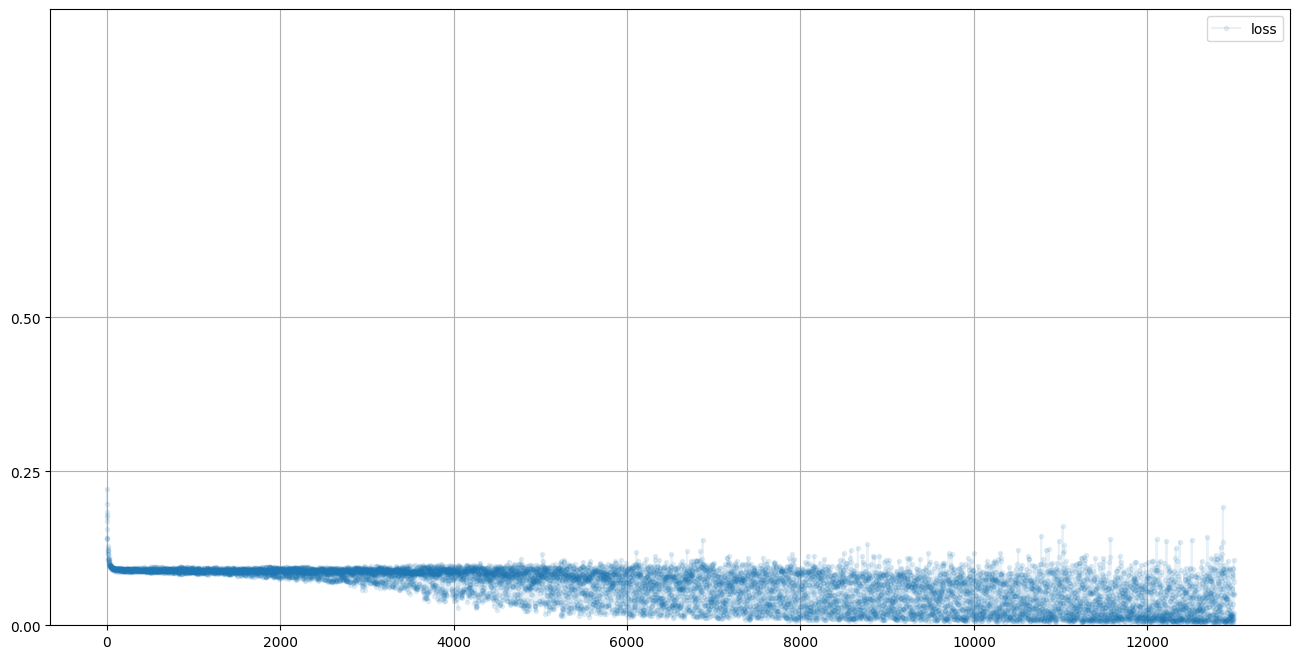

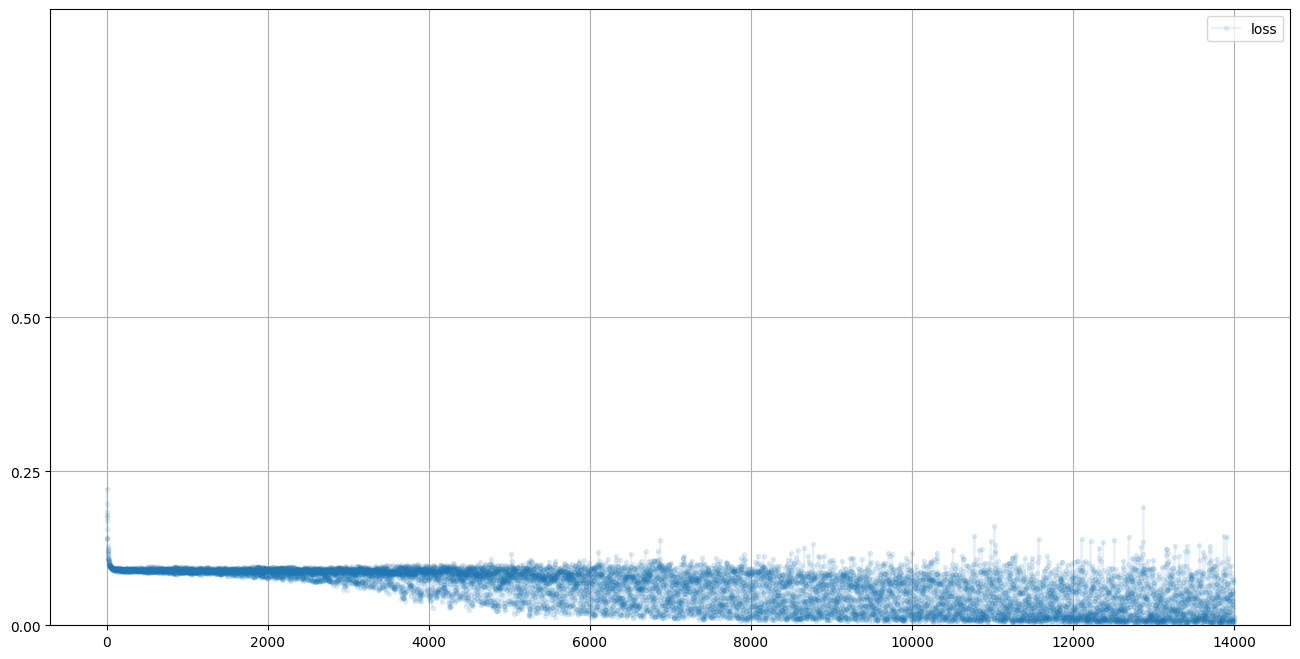

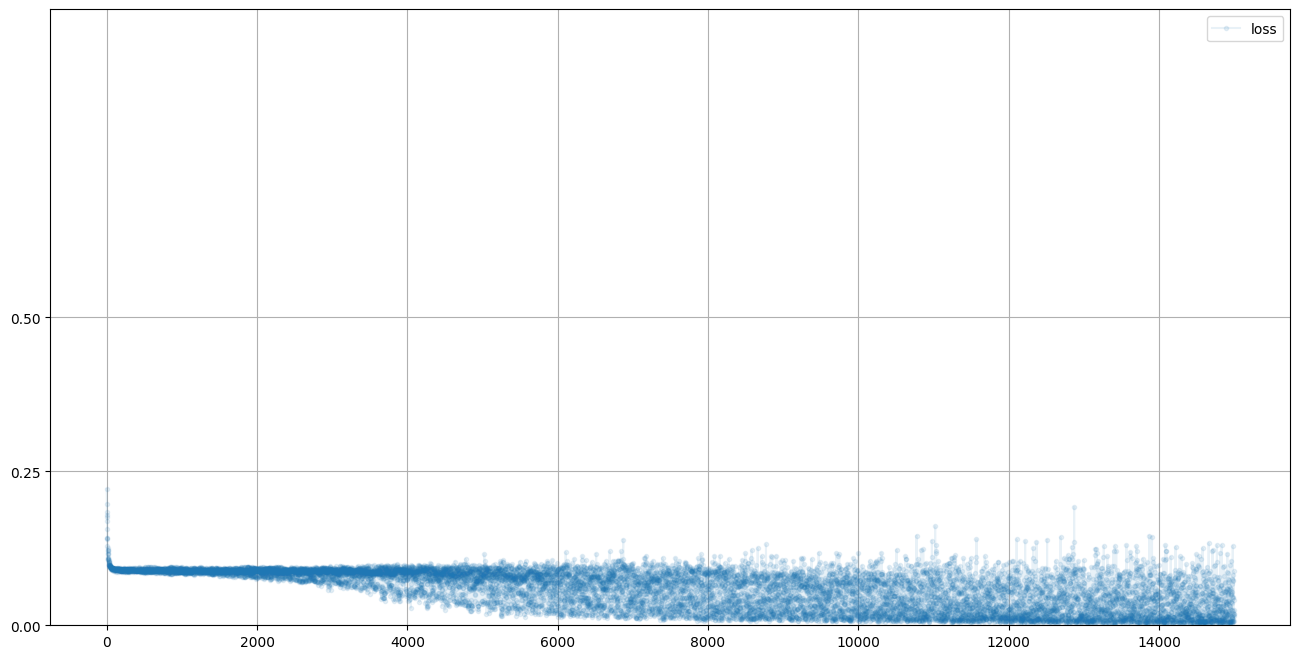

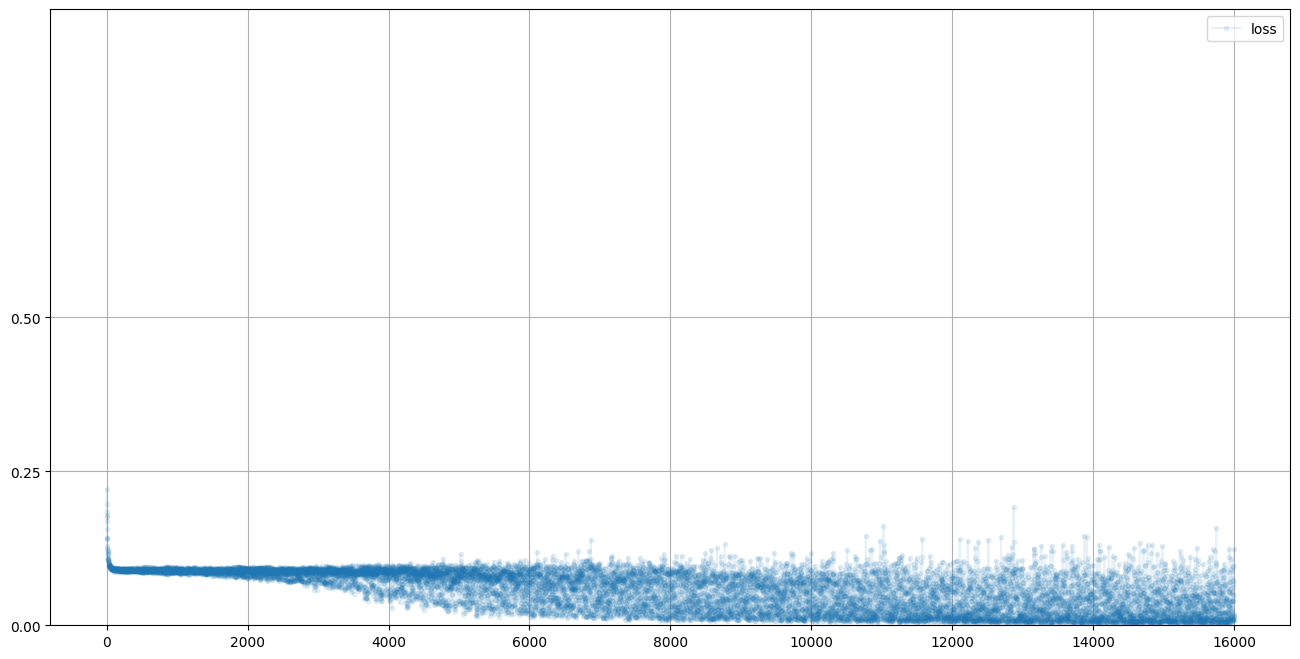

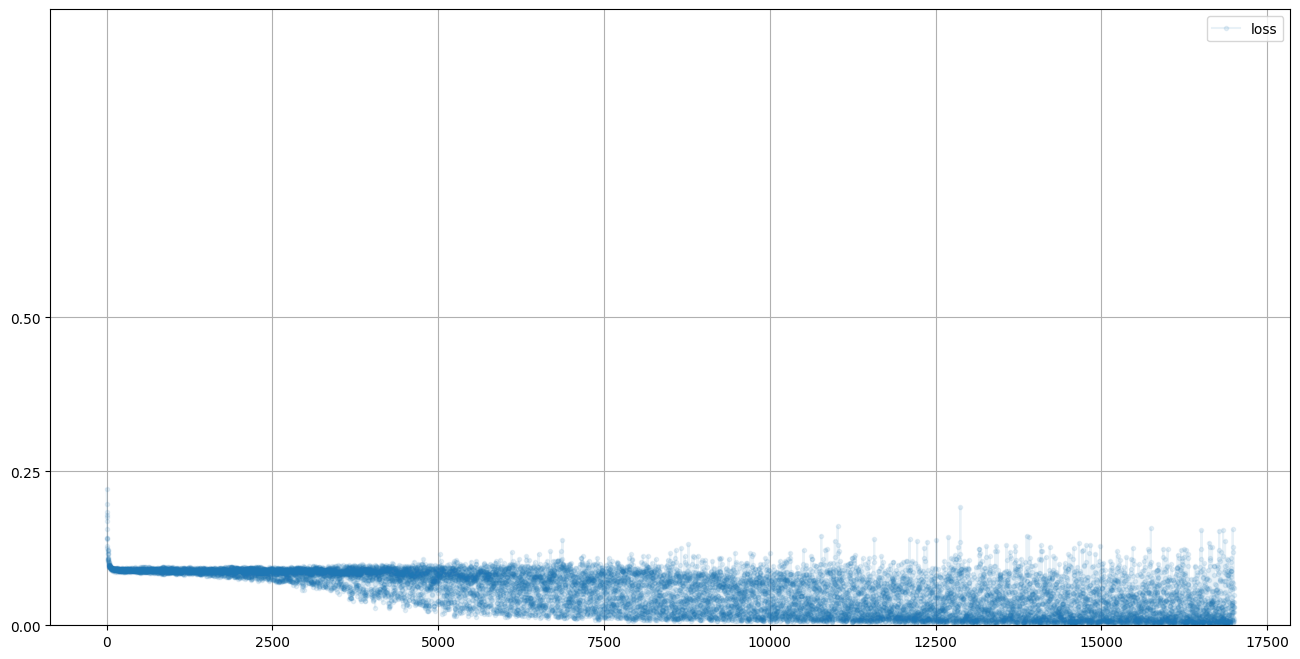

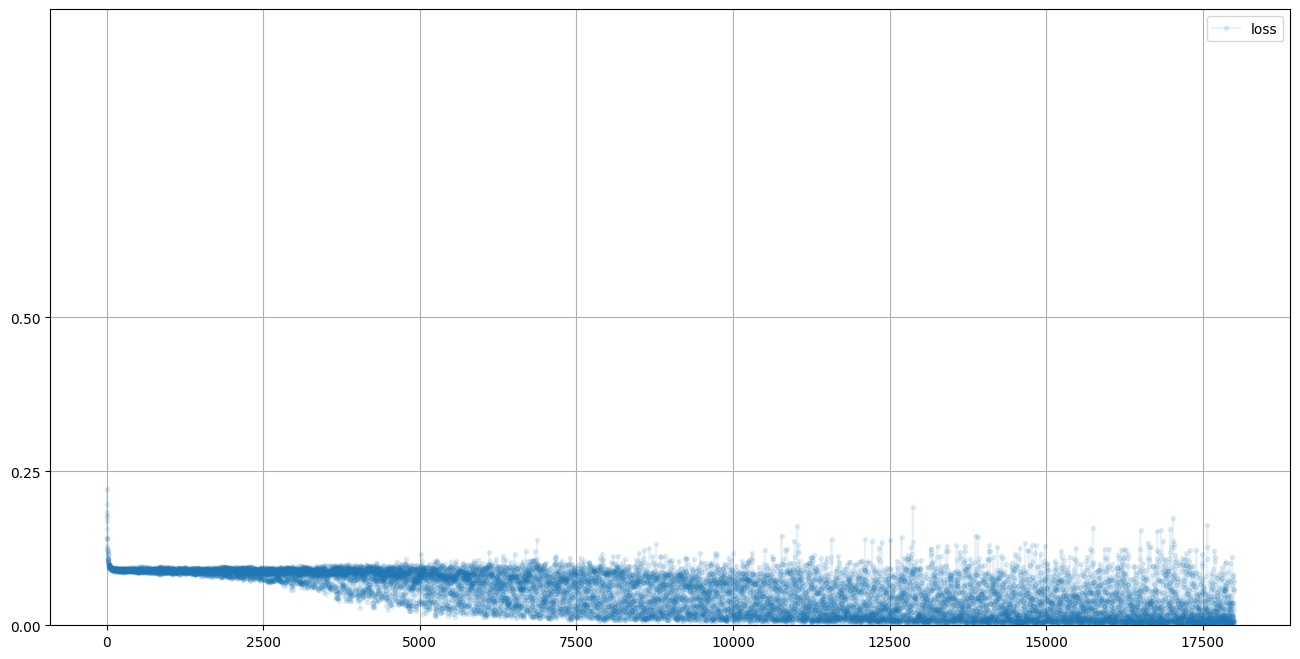

In [ ]:
## import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas
import matplotlib.pyplot as plt

class Classifier(nn.Module):

  def __init__(self):
    # init using PyTorch parent
    super().__init__()

    # define layers in the neural network
    self.model = nn.Sequential(
        nn.Linear(784,200),  #输入层784个节点到隐藏层200个节点的全连接映射，包含节点之间链接的权重，在训练时会被更新。
        nn.Sigmoid(),     #将S型逻辑激活函数应用于前一个模块的输出，也就是200个节点的输出
        nn.Linear(200,10),  #隐藏层200个节点到输出层10个节点的全连接映射，包含节点之间链接的权重，在训练时会被更新。
        nn.Sigmoid()
    )

    #define loss function
    self.loss_function = nn.MSELoss()  #MSE = Mean Squared Error 均方误差

    #define optimiser
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01) #SGD=Stochastic Gradient Descent 随机梯度下降

    # record training progress
    self.counter = 0
    self.progress = []

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    # calculate nn outputs
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs, targets)

    # when zero gradient, backward broadcast, and optimse weights
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    # increase counter, logging loss for every 10 trainings
    self.counter += 1
    if (self.counter % 10 == 0):
      print("After " ,self.counter ,"times of trainings")
      print(loss.item())
      self.progress.append(loss.item())
      pass

    # after 10000 times of training, plot the progress
    if (self.counter % 10000 == 0):
      self.plot_progress()
      pass

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.',
            grid=True, yticks=(0, 0.25, 0.5))
    pass

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # 目标图像 (标签)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # 图像数据, 取值范围是0~255，标准化为0~1
        image_values = torch.FloatTensor(self.data_df.iloc
        [index,1:].values) / 255.0

        # 返回标签、图像数据张量以及目标张量
        return label, image_values, target

    def plot_image(self, index):
      arr = self.data_df.iloc[index,1:].values.reshape(28,28)
      plt.title("label = " + str(self.data_df.iloc[index,0]))
      plt.imshow(arr, interpolation='none', cmap='Blues')

# 加载数据文件
from google.colab import drive
drive.mount('./mount')
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')
##mnist_dataset.plot_image(9)


# 创建神经网络
C = Classifier()

# 在MNIST数据集训练神经网络
epochs = 3

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

<Axes: >

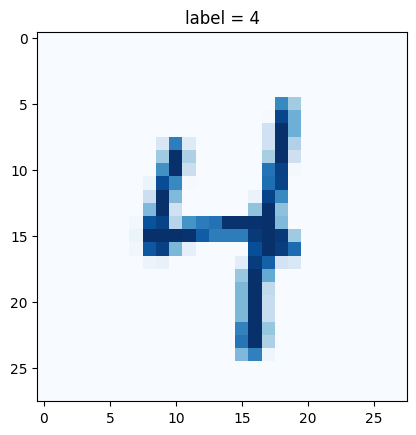

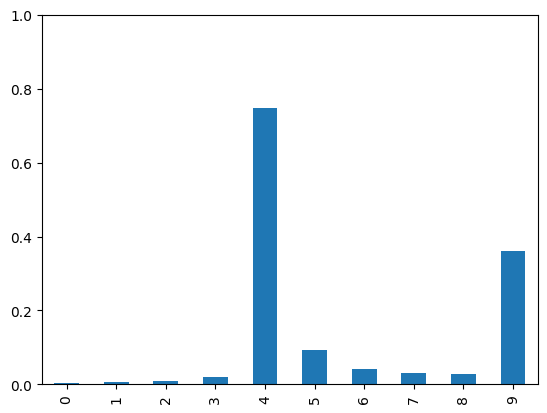

In [ ]:
# 加载MNIST测试数据
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_test.csv')

# 挑选一幅图像
record = 19

# 绘制图像和标签
mnist_test_dataset.plot_image(record)

image_data = mnist_test_dataset[record][1]

# 调用训练后的神经网络
output = C.forward(image_data)
# 绘制输出张量
pandas.DataFrame(output.detach().numpy()).plot(kind='bar',
legend=False, ylim=(0,1))